<a href="https://colab.research.google.com/github/rajitakolla/pythonCode/blob/master/Relationship_Between_Murder_And_CapitalPunishment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Rajita Kolla, Student ID: 11369877**

---



**Fetch Crime Rate and canada data sets**

In [0]:
import matplotlib as mat
%matplotlib inline

In [26]:
import pandas as pd

files_df = pd.read_csv('/content/sample_data/crime_rates.csv',skip_blank_lines=True)
files_df['duplicate'] = 1
#Display List of Columns
print(files_df.columns.to_list)


<bound method IndexOpsMixin.tolist of Index(['State', 'Year', 'Population', 'Violent Crime Rate', 'Murder Rate',
       'Forcible Rape Rate', 'Robbery Rate', 'Aggraveted Assault Rate',
       'Property Crime Rate', 'Burglary Rate', 'Larceny & Theft Rate',
       'Motor Vehicle Theft Rate', 'duplicate'],
      dtype='object')>


**1 THE DATA**

The main data source for this project comes from a paper by three researchers, Dezhbakhsh, Rubin, and Shepherd. The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every US state. The researchers compiled their data from the FBI’s Uniform Crime Reports. Since crimes are committed by people, not states, we need to account for the number of people in each state when we’re looking at state-level data. Murder rates are calculated as follows:


murder rate for state X in year Y = 100000 * (number of murders in state X in year Y / population in state X in year Y) (Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)



So far, this looks like a dataset that lends itself to an observational study. In fact, these data aren’t even enough to demonstrate an association between the existence of the death penalty in a state in a year and the murder rate in that state and year!

---



**1.1What additional information will we need before we can check for that association?**


Murder rates vary over time, and diﬀerent states exhibit diﬀerent trends. The rates in some states change dramatically from year to year, while others are quite stable. Let’s plot a couple, just to see the variety.



In [27]:
import datascience as dsc
import numpy as np

tableData = dsc.Table.from_df(files_df).select(['State','Murder Rate','Year','duplicate'])
yearlyCountDF = tableData.group(['State'])
print("The distinct year counts")
print(yearlyCountDF)
print(f"\n\n\nThe unique counts {np.unique(yearlyCountDF['count'])}")

The distinct year counts
State       | count
Alabama     | 44
Alaska      | 44
Arizona     | 44
Arkansas    | 44
California  | 44
Colorado    | 44
Connecticut | 44
Delaware    | 44
Florida     | 44
Georgia     | 44
... (40 rows omitted)



The unique counts [44]


**Answer)** The data need to be consistent to predict if we are dealing with the accurate analysis. In the above code we figured out how many years data for each country is being provided. From the analysis we are able to figure out there are 44 years of data which reamined consistent for all states.

**1.2 Draw a line plot with years on the horizontal axis and murder rates on the vertical axis.**
**Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call: ak mn.plot(’Year’).**

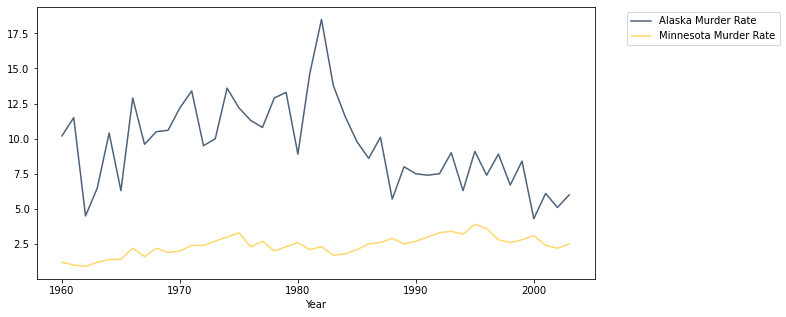

In [28]:
crimeRatesData = dsc.Table.from_df(files_df).select(['State','Murder Rate','Year'])
ak_mn = crimeRatesData.where('State','Alaska').relabeled(1,'Alaska Murder Rate').join('Year',crimeRatesData.where('State','Minnesota').relabeled(1,'Minnesota Murder Rate')).drop('State','State_2')
ak_mn.plot('Year',select=None,width=10,overlay=True,height=5)


**1.3 Implement the function most murderous, which takes a year (an integer) as its argument. It does two things:**

**1) It draws a horizontal bar chart of the 5 states that had the highest murder rate in that year.**

**2) It returns an array of the names of these states in order of increasing murder rate.**

Enter the year:1965
State          | Murder Rate
Alabama        | 11.4
Georgia        | 11.3
South Carolina | 9.6
Mississippi    | 8.9
Florida        | 8.9


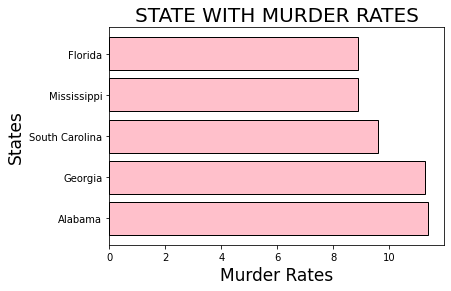

In [51]:
def mostMurderous(year):
  if(int(year)>999 and int(year) < 10000):
    murderDataDF = dsc.Table.from_df(files_df).select(['Year','State','Murder Rate']).where('Year',int(year)).drop(['Year']).sort('Murder Rate',descending=True).take[0:5]
    mat.pyplot.title('STATE WITH MURDER RATES',fontsize=20)
    mat.pyplot.ylabel('States',fontsize=17)
    mat.pyplot.xlabel('Murder Rates',fontsize=17)
    mat.pyplot.barh(murderDataDF['State'],murderDataDF['Murder Rate'],align='center',color='Pink',height=0.8)
    print(murderDataDF)
  pass


mostMurderous(input("Enter the year:"))

**1.4 How many more people were murdered in California in 1988 than in 1975? Assign ca change to the answer.**

**Answer** murder rate for state X in year Y = 100000 * (number of murders in state X in year Y / population in state X in year Y) 

So the number of murders = (murder_rate*population)/100000

In [75]:
def fetch_year_data(inputDF, year):
  return inputDF.where('Year', year)
  pass


def computeMurderRates(inputDF):
  return int((inputDF['Murder Rate']*inputDF['Population'])/100000);
  pass


californiaDF = dsc.Table.from_df(files_df).select(['State','Murder Rate','Year','Population']).where('State','California')
california_1975_df = fetch_year_data(californiaDF, 1975)
california_1988_df = fetch_year_data(californiaDF, 1988)
ca_change = computeMurderRates(california_1988_df)-computeMurderRates(california_1975_df)
print(f"Number Of people Murdered : {ca_change}")



Number Of people Murdered : 726


**2 Changes in Murder Rates**

Murder rates vary widely across states and years, presumably due to the vast array of diﬀerences among states and across US history. Rather than attempting to analyze rates themselves, here we will restrict our analysis to whether or not murder rates increased or decreased over certain time spans. We will not concern ourselves with how much rates increased or decreased; only the direction of the change - whether they increased or decreased.


---



**2.1. Implement the function two year changes that takes an array of murder rates for a state, ordered by increasing year. For all two-year periods (e.g., from 1960 to 1962), it computes and returns the number of increases minus the number of decreases**

We can use two year changes to summarize whether rates are mostly increasing or decreasing over time for some state or group of states. Let’s see how it varies across the 50 US states.

In [214]:


murderRatesDF1 = dsc.Table.from_df(files_df).select(['State','Murder Rate','Year'])
states = list(np.unique(murderRatesDF1['State']))

def removeSublist(lst): 
    result = [] 
    for elements in lst:
      result.append(elements[0])      
    return result 
    pass


def two_year_changes(murderRates_State):
  return [murderRates_State[i+2]-murderRates_State[i] for i in range(0,len(murderRates_State)-2)]
  pass

def generate_difference(result_list):
  return len([i for i in result_list if i >0]) - len([i for i in result_list if i < 0])
  pass

difference = []
two_year_change_values = []
for state in states:
  #murderRatesDF1.where('State',state).sort('Year').show()
  murderRates_State = murderRatesDF1.where('State',state).sort('Year').select(['Murder Rate']).to_df().values.tolist()
  murderRates_State = removeSublist(murderRates_State)
  murderRates_rate = two_year_changes(murderRates_State)
  # for problem 2.4
  two_year_change_values.append(len(murderRates_rate))
  difference.append(generate_difference(murderRates_rate))
  

print(dict(zip(states,difference)))
  




{'Alabama': -6, 'Alaska': -5, 'Arizona': 1, 'Arkansas': -1, 'California': 17, 'Colorado': -4, 'Connecticut': 4, 'Delaware': -3, 'Florida': -6, 'Georgia': -3, 'Hawaii': -2, 'Idaho': -3, 'Illinois': 8, 'Indiana': 5, 'Iowa': 4, 'Kansas': 5, 'Kentucky': -6, 'Louisiana': 8, 'Maine': 5, 'Maryland': 9, 'Massachuse': 2, 'Michigan': -4, 'Minnesota': 6, 'Mississippi': -2, 'Missouri': 0, 'Montana': 0, 'Nebraska': 5, 'Nevada': 5, 'New Hampshire': -3, 'New Jersey': 10, 'New Mexico': -1, 'New York': 3, 'North Carolina': -10, 'North Dakota': 1, 'Ohio': 3, 'Oklahoma': 1, 'Oregon': -1, 'Pennsylvania': 5, 'Rhode Isla': 6, 'South Carolina': -11, 'South Dakota': -3, 'Tennessee': -2, 'Texas': 2, 'Utah': 5, 'Vermont': -1, 'Virginia': -8, 'Washington': 6, 'West Virginia': 3, 'Wisconsin': 1, 'Wyoming': 0}


**2.2 Assign changes by state to a table with one row per state that has two columns: the State name and the Murder Rate two year changes statistic computed across all years in our data set for that state.**

In [160]:
# create a table 
tables_Murder_df = dsc.Table().with_columns('State Name',states,'Murder Rate two year changes',difference)
print(tables_Murder_df)

State Name  | Murder Rate two year changes
Alabama     | -6
Alaska      | -5
Arizona     | 1
Arkansas    | -1
California  | 17
Colorado    | -4
Connecticut | 4
Delaware    | -3
Florida     | -6
Georgia     | -3
... (40 rows omitted)


In [369]:
#generate a histogram for the above changes

tables_Murder_df.hist("Murder Rate two year changes")

SyntaxError: ignored

**2.3 Assign total changes to the total increases minus the total decreases for all two-year periods and all states in our data set.**

In [154]:
total_changes = len([i for i in tables_Murder_df['Murder Rate two year changes'] if i > 0]) - len([i for i in tables_Murder_df['Murder Rate two year changes'] if i < 0])
print(f"Total changes: {total_changes}")

Total changes: 5


**2.4 Set num changes to the number of diﬀerent two-year periods in the entire data set that could result in a change of a state’s murder rate. Include both those periods where a change occurred and the periods where a state’s rate happened to stay the same.**

We now have enough information to perform a hypothesis test. 

**Null Hypothesis:** State murder rates increase and decrease over two-year periods as if “increase” or “decrease” were sampled at random from a uniform distribution, like a fair coin ﬂip.


Since it’s possible that murder rates are more likely to go up or more likely to go down, our alternative hypothesis should contemplate either case: 


**Alternative Hypothesis:** State murder rates are either more likely or less likely to increase than decrease over two-year periods.


**Technical note:** These changes in murder rates are not random samples from any population. They describe all murders in all states over all recent years. However, we can imagine that history could have been diﬀerent, and that the observed changes are the values observed in only one possible world: the one that happened to occur. In this sense, we can evaluate whether the observed “total increases minus total decreases” is consistent with a hypothesis that increases and decreases are drawn at random from a uniform distribution.


In [195]:
print(sum(two_year_change_values))
print(set(two_year_change_values))
num_changes = sum(tables_Murder_df['Murder Rate two year changes'])
print(f"num_changes {num_changes}")



2100
{42}
num_changes 45


**Answer)** The total change in values remains same across all the states.

**2.5  Given these null and alternative hypotheses, deﬁne a good test statistic.**

Important requirements for your test statistic: Choose a test statistic for which large positive values are evidence in favor of the alternative hypothesis, and other values are evidence in favor of the null hypothesis. Your test statistic should depend only on whether murder rates increased or decreased, not on the size of any change.


**Answer)** With the given Null and Alternative test statistic we can infer that the samples increase and decrease at random for a distribution. Obtain randlomy simulated values for different subsets.Central tendancy is near to the statistic value

**TEST STATISTIC** Differences between the number of increases and number of decreases

**2.6 Complete the simulation below, which samples num changes increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis. Your job is to**
*   **ﬁll in the function simulate under null, which simulates a single sample under the null hypothesis, and**
*   **ﬁll in its argument when it’s called below**



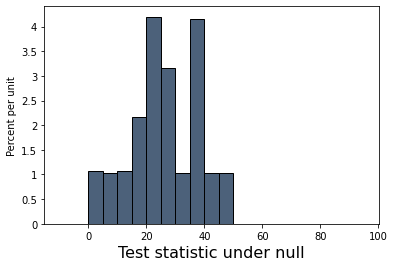

In [255]:
crimes_data = dsc.Table.from_df(files_df).select(['State','Murder Rate','Year'])
def simulate_under_null(num_chances_to_change):
    year_gap = 2
    teststatistic = []
    for i in np.arange(500):
        Results = []
        if year_gap >= 40:
            year_gap = 2
        sample_table = crimes_data.sample(2000)
        for state in states:
            crime_state = crimes_data.where('State', dsc.are.equal_to(state)).drop('State', 'Population').sort('Year')
            result_list = np.array(crime_state['Murder Rate'])[2:] - np.array(crime_state['Murder Rate'])[:-2]
            Results.append(np.count_nonzero(result_list[:len(result_list)-year_gap] > 0) - np.count_nonzero(result_list[:len(result_list)-year_gap] < 0))
        year_gap = year_gap + 2
        final_result = dsc.Table().with_columns('State', states,
                                             'Murder Rate two_year_changes', Results)
        teststatistic.append(np.count_nonzero(final_result['Murder Rate two_year_changes'] > 0) - np.count_nonzero(final_result['Murder Rate two_year_changes'] < 0))
    return teststatistic
dsc.Table().with_column('Test statistic under null', simulate_under_null(500)).hist(0, bins=np.arange(-10, 100, 5))


In [0]:
import random 

teststatistic = []
randomGenerator = 50


statdataset = dsc.Table().from_df(files_df).select(['State', 'Year', 'Murder Rate'])
murderRatesDF1 = dsc.Table.from_df(files_df).select(['State','Murder Rate','Year'])


def fetch_each_year_data():
  year_gap = 2
  list_of_values = list()
  for state in states:
      #murderRatesDF1.where('State',state).sort('Year').show()
      murderRates_State = murderRatesDF1.where('State',state).sort('Year').select(['Murder Rate'])
      diff_array = np.array(murderRates_State['Murder Rate'])[2:] - np.array(murderRates_State['Murder Rate'])[:-2]
      list_of_values.append(np.count_nonzero(diff_array[:len(diff_array)-year_gap] > 0) - np.count_nonzero(diff_array[:len(diff_array)-year_gap] < 0))

  return list_of_values
  pass

def simulate_under_null(num_chances_to_change):
  """Simulates some number chaging several times, with an equal chance to increase or decrease. 
      Returns the value of your test statistic for these simulated changes


  num_chances_to_change is the number of times the number changes
  """
  year_gap = 2
  #Step count will be incremented by 2 
  for i in np.arange(num_chances_to_change):
    if year_gap >= randomGenerator:
      year_gap = 2
    sample_set = statdataset.sample(random.randint(100,5000))
    year_gap = year_gap+2
    new_dataset = dsc.Table().with_column('States',states,'Murder Rate two_year_changes',fetch_each_year_data())
    teststatistic.append(np.count_nonzero(new_dataset['Murder Rate two_year_changes'] > 0) - np.count_nonzero(new_dataset['Murder Rate two_year_changes'] < 0))
  return teststatistic
  pass


year_gap = 2 # as the increae or decrease is measured with step count 2
uniform_samples =dsc.util.make_array()
for i in np.arange(5):
  uniform_samples = np.append(uniform_samples, simulate_under_null(i))

#dsc.Table().with_column('Test statistic under null', uniform_samples).hist(0,bins=np.arange(-10,100,10))


**2.7. Looking at this histogram, draw a conclusion about whether murder rates basically increase as often as they decrease.**


**Answer)**  From the histogram we can predict that the data is likely to be increasing

**3 - The death penalty**

Some US states have the death penalty, and others don’t, and laws have changed over time. In addition to changes in murder rates, we will also consider whether the death penalty was in force in each state and each year. Using this information, we would like to investigate how the death penalty aﬀects the murder rate of a state.


**3.1.** **Describe this investigation in terms of an experiment. What population are we studying? What is the control group? What is the treatment group? What outcome are we measuring?**


**Answer)** 

Poulation : The population of all the members in united states.


Control Group : List of states where death penality is not been implemented but there is a murder rate.

Treatment Group: List of states where death penality was implemented


Measuring outcome : We are intended to predict if there is any change in the murder rate where death penality exists and not exixts. That is a increase or decrease in the murder rates

**3.2 We want to know whether the death penalty causes a change in the murder rate. Why is it not suﬃcient to compare murder rates in places and times when the death penalty was in force with places and times when it wasn’t?**

**Answer)**

In our analysis Death rate alone cant be the deciding factor predict the increase in the murder rates. The murder rate can be controlled by effective implementation of rules, eradicating crime, reducing the poverty lines etc. 

In [259]:
listOfStates = dsc.make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
crimes_data = dsc.Table.from_df(files_df).select(['State','Murder Rate','Year'])
def evaluate_existance(stateName):
    return stateName not in listOfStates

states_values = crimes_data.group('State').select('State')
death_penalty = states_values.with_column('Death Penalty', states_values.apply(evaluate_existance, 0))
death_penalty

State,Death Penalty
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
Florida,True
Georgia,True


**A Natural Experiment**
In order to attempt to investigate the causal relationship between the death penalty and murder rates, we’re going to take advantage of a natural experiment. A natural experiment happens when something other than experimental design applies a treatment to one group and not to another (control) group, and we can reasonably expect that the treatment and control groups don’t have any other systematic diﬀerences.


Our natural experiment is this: in 1972, a Supreme Court decision called Furman v. Georgia banned the death penalty throughout the US. Suddenly, many states went from having the death penalty to not having the death penalty. 


As a ﬁrst step, let’s see how murder rates changed before and after the court decision. We’ll deﬁne the test as follows: 

• **Population:** All the states that had the death penalty before the 1972 abolition. (There is no control group for the states that already lacked the death penalty in 1972, so we must omit them.) This includes all US states except Alaska, Hawaii, Maine, Michigan, Wisconsin, and Minnesota.

• **Treatment group:** The states in that population, in the year after 1972. 

• **Control group:** The states in that population, in the year before 1972. 

• **Null hypothesis:** Each state’s murder rate was equally likely to be higher or lower in the treatment period than in the control period. (Whether the murder rate increased or decreased in each state was like the ﬂip of a fair coin.) 

• **Alternative hypothesis:** The murder rate was more likely to increase or more likely to decrease. 



**Technical Note:** It’s not clear that the murder rates were a ”sample” from any larger population. Again, it’s useful to imagine that our data could have come out diﬀerently and to test the null hypothesis that the murder rates were equally likely to move up or down.



**3.3 Assign death penalty murder rates to a table with the same columns and data as murder rates, but that has only the rows for states that had the death penalty in 1971.**

The null hypothesis doesn’t specify how the murder rate changes; it only talks about increasing or decreasing. So, we will use the same test statistic you deﬁned in section 2.


In [273]:
crime_rates_data = crimes_data.where('Year',1971)
murder_rates_in_1971 = crime_rates_data.where('State', dsc.are.not_equal_to('Alaska')).where('State', dsc.are.not_equal_to('Minnesota')).where('State', dsc.are.not_equal_to('Wisconsin')).where('State', dsc.are.not_equal_to('Michigan')).where('State', dsc.are.not_equal_to('Maine')).where('State', dsc.are.not_equal_to('Hawaii'))
print(murder_rates_in_1971)

total_data_set = crimes_data.where('State', dsc.are.not_equal_to('Alaska')).where('State', dsc.are.not_equal_to('Minnesota')).where('State', dsc.are.not_equal_to('Wisconsin')).where('State', dsc.are.not_equal_to('Michigan')).where('State', dsc.are.not_equal_to('Maine')).where('State', dsc.are.not_equal_to('Hawaii'))
print(total_data_set)

State       | Murder Rate | Year
Alabama     | 15.1        | 1971
Arkansas    | 10.5        | 1971
Arizona     | 6.7         | 1971
California  | 8.1         | 1971
Colorado    | 6.5         | 1971
Connecticut | 3.1         | 1971
Delaware    | 6.1         | 1971
Florida     | 13.3        | 1971
Georgia     | 16          | 1971
Iowa        | 1.8         | 1971
... (34 rows omitted)
State   | Murder Rate | Year
Alabama | 12.4        | 1960
Alabama | 12.9        | 1961
Alabama | 9.4         | 1962
Alabama | 10.2        | 1963
Alabama | 9.3         | 1964
Alabama | 11.4        | 1965
Alabama | 10.9        | 1966
Alabama | 11.7        | 1967
Alabama | 11.8        | 1968
Alabama | 13.7        | 1969
... (1926 rows omitted)


**3.4 Assign changes 72 to the value of the test statistic for the years 1971 to 1973 and the states in death penalty murder rates.**


In [328]:
testresult = list()
new_column_name = 'Murder Rate changes_72'
List_of_States_having_death_penality = np.unique(total_data_set['State'])
def extract_required_values_for_year(dataset,state,year,index):
  return dataset.where('State', dsc.are.equal_to(state)).where('Year', year)['Murder Rate'][index]
  pass
for state in List_of_States_having_death_penality:
    values_1973 = extract_required_values_for_year(total_data_set,state,1973,0)
    values_1971 = extract_required_values_for_year(total_data_set,state,1971,0)
    difference = values_1973 - values_1971
    testresult.append(difference)
changes_72 = dsc.Table().with_columns('State', List_of_States_having_death_penality,new_column_name, testresult)
difference_72  = np.count_nonzero(changes_72[new_column_name] > 0) - np.count_nonzero(changes_72[new_column_name] < 0)
print(f'Increases minus decreases from 1971 to 1973: {difference_72}')

Increases minus decreases from 1971 to 1973: 22


**3.5  Draw an empirical histogram of the statistic under the null hypothesis by simulating the test statistic 5,000 times.**

State       | year 1971 | year 1973 | difference
Alabama     | 15.1      | 13.2      | -2
Arizona     | 6.7       | 8.1       | 1
Arkansas    | 10.5      | 8.8       | -2
California  | 8.1       | 9         | 1
Colorado    | 6.5       | 7.9       | 1
Connecticut | 3.1       | 3.3       | 0
Delaware    | 6.1       | 5.9       | -0
Florida     | 13.3      | 15.4      | 2
Georgia     | 16        | 17.4      | 1
Idaho       | 3.3       | 2.6       | -1
... (34 rows omitted)


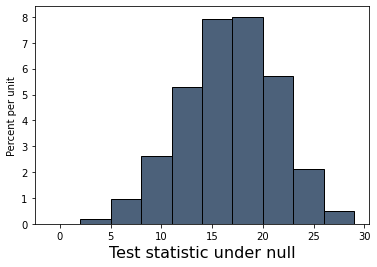

In [365]:
def filter_data_basing_on_year(dataSet, year):
  return dataSet.where('Year',year);
  pass

dataSet_1971_and_1973_df = filter_data_basing_on_year(total_data_set,1971).append(filter_data_basing_on_year(total_data_set,1973))
rates_1971DF = list()
rates_1973DF = list()
for state in List_of_States_having_death_penality:
  rates_1971DF.append(extract_required_values_for_year(dataSet_1971_and_1973_df,state,1971,0))
  rates_1973DF.append(extract_required_values_for_year(dataSet_1971_and_1973_df,state,1973,0))
final_difference = np.array(rates_1973DF)-np.array(rates_1971DF)
final_difference_table = dsc.Table().with_columns('State',List_of_States_having_death_penality,'year 1971',rates_1971DF,'year 1973',rates_1973DF,'difference',np.round(final_difference))
print(final_difference_table)

Total_count = 44

def simulate_under_null1(num_chances_to_change):
    testStatistic  = list()
    year_gap = 2
    for i in np.arange(num_chances_to_change):
        if year_gap >= Total_count:
            year_gap = 2
        sample_table = final_difference_table.sample()
        array_difference = sample_table['difference']
        testStatistic.append(np.count_nonzero(array_difference[:len(array_difference)-year_gap] > 0) - np.count_nonzero(array_difference[:len(array_difference)-year_gap] < 0))
    return testStatistic
  
dsc.Table().with_column('Test statistic under null', simulate_under_null1(5000)).hist(bins=np.arange(-1,30,3))




**3.6. Complete the analysis as follows:**



1.   **Compute a P-value.**
2.   **Draw a conclusion about the null and alternative hypotheses**
3.   **Describe your ﬁndings using simple, non-technical language. Be careful not to claim that the statistical analysis has established more than it really has.**




In [367]:
np.count_nonzero(np.array(simulate_under_null1(5000)) >= 22) / 50000

0.01248

**Answer)**
**1) P Value obtained is 0.01248**

**2) As the obtained value is less than 0.5 we can accept the alternative hypothesis**

**3) The observations clearly predict that the murder rates doesnot depends on death penality but there are several other influencing factors**

---





**FURTHER EVIDENCE**

So far, we have discovered evidence that when executions were outlawed, the murder rate increased in many more states than we would expect from random chance. We have also seen that across all states and all recent years, the murder rate goes up about as much as it goes down over two-year periods. These discoveries seem to support the claim that eliminating the death penalty increases the murder rate. Should we be convinced? Let’s conduct some more tests to strengthen our claim. 


Conducting a test for this data set required the following steps:


1. Select a table containing murder rates for certain states and all years,
2. Choose two years and compute the observed value of the test statistic,
3. Simulate the test statistic under the null hypothesis that increases and decreases are drawn uniformly at random, then
4. Compare the observed diﬀerence to the empirical distribution to compute a P-value.

This entire process can be expressed in a single function, called run test.


**4.1 Implement run test, which takes the following arguments:**



->   **A table of murder rates for certain states, sorted by state and year like murder rates, and**


->   **the year when the analysis starts. (The comparison group is two years later.)**

It prints out the observed test statistic and returns the P-value for this statistic under the null hypothesis



In [319]:
column1 = 'Change'
column2 = 'Chance'
sample_size = 100
uniform = dsc.Table().with_columns(column1, dsc.make_array('Increase', 'Decrease'),column2, dsc.make_array(0.5,0.5))
uniform.sample_from_distribution('Chance', sample_size)

Change,Chance,Chance sample
Increase,0.5,49
Decrease,0.5,51


In [0]:
def simulate_under_null(num_chances_to_change):
    return uniform.sample_from_distribution(column2, sample_size).column(2).item(0) - uniform.sample_from_distribution(column2, sample_size).column(2).item(1)
    pass



In [0]:
def compute_observed_statistic(IncAndDec):
  return np.count_nonzero(IncAndDec > 0) - np.count_nonzero(IncAndDec < 0) 
  pass

In [0]:
def compute_p_value(samples,test_statistic):
  num_above_test_stat = np.count_nonzero(samples >= test_statistic)
  num_below_test_stat = np.count_nonzero(samples <= test_statistic)
  if test_statistic > 0:
    p_value = num_above_test_stat/5000
  elif test_statistic < 0:
    p_value = num_below_test_stat/5000
  return p_value
  pass

In [327]:
def run_test(murder_rates, start_year):
    num_states = murder_rates.group('State').num_rows
    end_year = start_year + 2
    table_years = murder_rates.where('Year', dsc.are.contained_in(dsc.make_array(start_year, end_year)))
    IncAndDec = dsc.make_array()

    for i in np.arange(num_states):
        states = table_years.sort('State', distinct = True).column('State')
        state = states.item(i)
        difference = np.diff(table_years.where('State', state).column('Murder Rate'))
        IncAndDec = np.append(IncAndDec, difference)

    observed_test_statistic = compute_observed_statistic(IncAndDec)

    samples = dsc.make_array()
    for i in np.arange(5000):
        samples = np.append(samples, simulate_under_null(num_states))
    p_value = compute_p_value(samples,observed_test_statistic)
    print(f"Test statistic {start_year} to {end_year} : {observed_test_statistic}")
    return p_value

year = input("Enter the year ")
run_test(total_data_set, int(year))

Enter the year1965
Test statistic 1965 to 1967 : 34


32.2674

**The death penalty reinstated**

In 1976, the Supreme Court repealed its ban on the death penalty in its rulings on a series of cases including Gregg v. Georgia, so the death penalty was reinstated where it was previously banned. This generated a second natural experiment. To the extent that the death penalty deters murder, reinstating it should decrease murder rates, just as banning it should increase them.


**4.3 Now we’ve analyzed states where the death penalty went away and came back, as well as states where the death penalty was outlawed all along. What do you conclude from the results of the tests we have conducted so far? Does all the evidence consistently point toward one conclusion, or is there a contradiction?**

**Answer)** 
**When the death penality was started there is a slight decrease in the murder rate but we failed to accept null hypothesis as the p value obtained is less than 0.05**

**VISUALIZATION**

While our analysis appears to support the conclusion that the death penalty deters murder, a 2006 Stanford Law Review paper argues the opposite: that historical murder rates do not provide evidence that the death penalty deters murderers. To understand their argument, we will draw a picture. In fact, we’ve gone at this whole analysis rather backward; typically we should draw a picture ﬁrst and ask precise statistical questions later! What plot should we draw? 



We know that we want to compare murder rates of states with and without the death penalty. We know we should focus on the period around the two natural experiments of 1972 and 1976, and we want to understand the evolution of murder rates over time for those groups of states. It might be useful to look at other time periods, so let’s plot them all for good measure.


**5.1 Create a table called average murder rates with 1 row for each year in murder rates. It should have 3 columns:**



1.   **Year, the year**
2.   **Death penalty states, the average murder rate of the states that had the death penalty in 1971, and**
3.   **No death penalty states, the average murder rate of the other states.**

**average murder rates should be sorted in increasing order by year.**






In [0]:
def filter_based_on_peanlity(dataset_years_df, value):
  return dataset_years_df.where('Death Penalty', value)['Murder Rate'].mean()
  pass

In [335]:
columns_dropped = ['State','Population']
dealth_peanlityDF = crimes_data.join('State', death_penalty)
dealth_peanlity_filtered_DF = dealth_peanlityDF.drop(columns_dropped)
listOfyears = np.unique(dealth_peanlity_filtered_DF['Year'])
list_of_states_with_penality = list()
list_of_states_without_penality = list()
for year in listOfyears:
    dataset_years_df = dealth_peanlity_filtered_DF.where('Year',year)
    list_of_states_with_penality.append(filter_based_on_peanlity(dataset_years_df,True))
    list_of_states_without_penality.append(filter_based_on_peanlity(dataset_years_df,False))
average_murders_df = dsc.Table().with_columns('Year', listOfyears,'States with Death Penality', np.round(list_of_states_with_penality),'States Without death Penality', np.round(list_of_states_without_penality))
print(average_murders_df)

Year | States with Death Penality | States Without death Penality
1960 | 5                          | 4
1961 | 5                          | 4
1962 | 5                          | 2
1963 | 5                          | 3
1964 | 5                          | 3
1965 | 5                          | 3
1966 | 5                          | 5
1967 | 6                          | 4
1968 | 6                          | 5
1969 | 7                          | 5
... (34 rows omitted)


**5.2 Describe in one short sentence a high-level takeaway from the line plot below. Are the murder rates in these two groups of states related? average murder rates.plot(’Year’).**


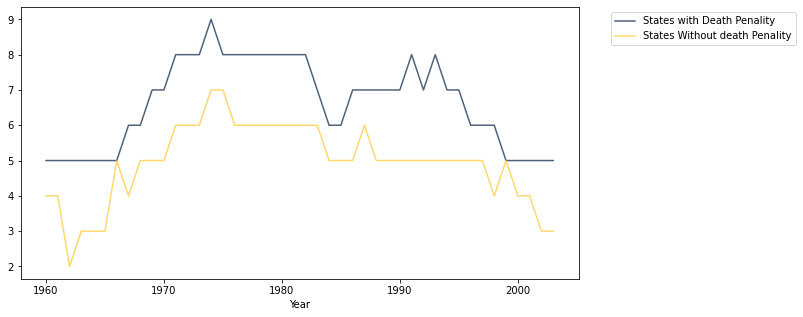

In [342]:
average_murders_df.plot('Year',select=None,width=10,overlay=True,height=5)


(array([ 1.,  0.,  5.,  0.,  6.,  0., 18.,  0., 12.,  2.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 10 Patch objects>)

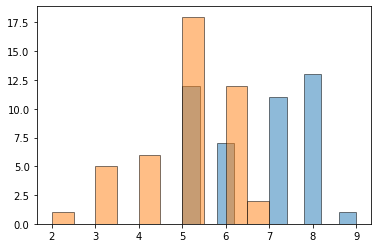

In [350]:
mat.pyplot.hist(average_murders_df['States with Death Penality'],alpha=0.5,label = 'States with Death Penality')
mat.pyplot.hist(average_murders_df['States Without death Penality'],alpha=0.5,label = 'States without Death Penality')

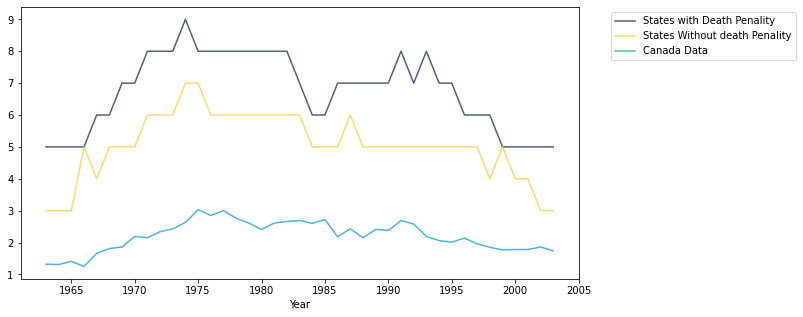

In [357]:
murder_rates_with_canada =  pd.read_csv('/content/sample_data/canada.csv',skip_blank_lines=True)
murder_rates_with_canada = dsc.Table().from_df(murder_rates_with_canada).select('Year','Homicide').relabeled('Homicide','Canada Data')
final_df = average_murders_df.join('Year',murder_rates_with_canada)
final_df.plot('Year',select=None,width=10,overlay=True,height=5)

**Answer) States which have death penality implemented has highest murder rate**

**5.3  Complete their argument in 2-3 sentences; what features of these plots indicate that the death penalty is not an important factor in determining the murder rate? (If you’re stuck, read the paper.)**

**Answer)** **Death Penality is not oly the critical factor to influence the murder rates. In the above graph the states which have implemented death penalities have higher murder rates**

**5.5 What assumption(s) did we make in Parts 1 through 4 of the project that led us to believe that the death penalty deterred murder, when in fact the line plots tell a diﬀerent story?**

**Answer) Our assumption is that the death penality helps reduces the murder rate but it was contradicted. From our analysis we can infer that death penality not the influencing factor to decide the murder rate**